In [58]:
# import libraries
import pandas as pd
import numpy as np

# For data visualisation
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
# read and check the data
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [81]:
print('The data has {} columns and {}  records.'.format(data.shape[1], data.shape[0]))

The data has 13 columns and 299  records.


In [60]:
# check for missing values and datatype
missing_values = pd.DataFrame(data.isnull().sum(), columns = ['missing'])
missing_values['datatype'] = data.dtypes
missing_values

,missing,datatype
age,0,float64
anaemia,0,int64
creatinine_phosphokinase,0,int64
diabetes,0,int64
ejection_fraction,0,int64
high_blood_pressure,0,int64
platelets,0,float64
serum_creatinine,0,float64
serum_sodium,0,int64
sex,0,int64


There is no missing data and object data type in the dataset.

# EDA

In [61]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


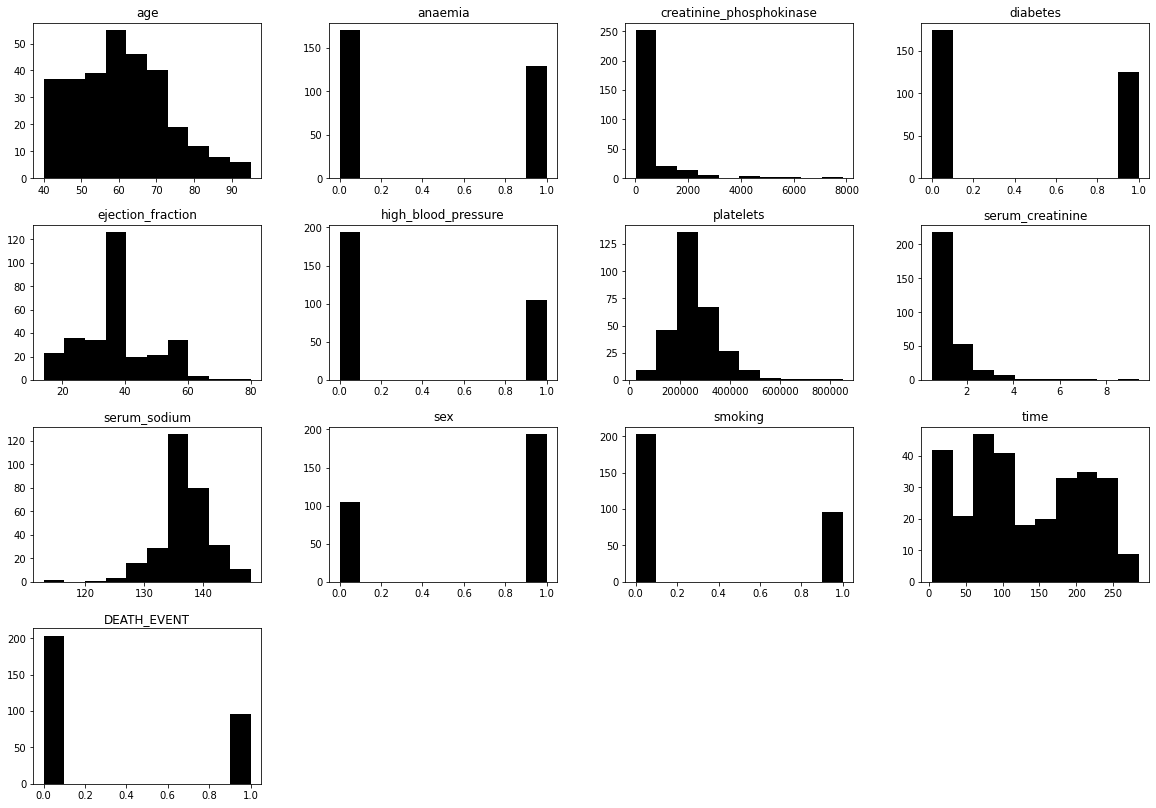

In [62]:
data.hist(color = 'black', grid = False, figsize = (20, 14));

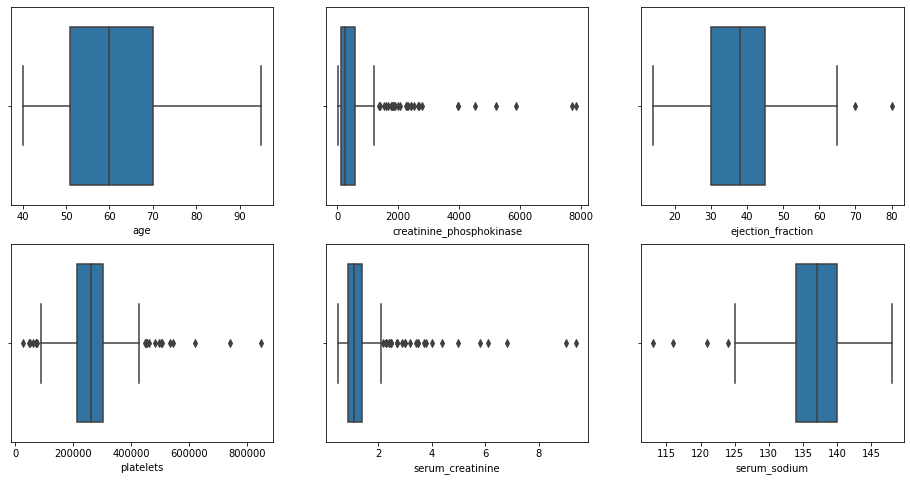

In [140]:
fig, ax = plt.subplots(2, 3, figsize= (16, 8))
sns.boxplot(data = data, x = 'age', ax = ax[0][0])
sns.boxplot(data = data, x = 'creatinine_phosphokinase', ax = ax[0][1])
sns.boxplot(data = data, x = 'ejection_fraction', ax = ax[0][2])
sns.boxplot(data = data, x = 'platelets', ax = ax[1][0])
sns.boxplot(data = data, x = 'serum_creatinine', ax = ax[1][1])
sns.boxplot(data = data, x = 'serum_sodium', ax = ax[1][2]);

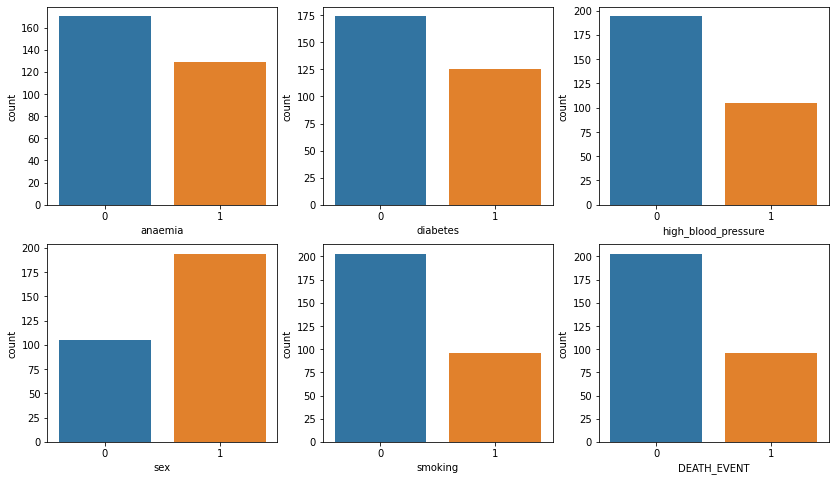

In [63]:
fig, ax = plt.subplots(2, 3, figsize= (14, 8))
sns.countplot(data = data, x = 'anaemia', ax = ax[0][0])
sns.countplot(data = data, x = 'diabetes', ax = ax[0][1])
sns.countplot(data = data, x = 'high_blood_pressure', ax = ax[0][2])
sns.countplot(data = data, x = 'sex', ax = ax[1][0])
sns.countplot(data = data, x = 'smoking', ax = ax[1][1])
sns.countplot(data = data, x = 'DEATH_EVENT', ax = ax[1][2]);

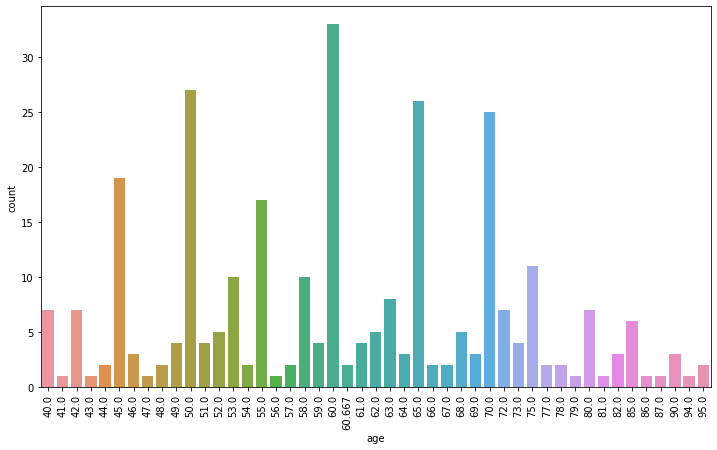

In [64]:
plt.figure(figsize = (12, 7))
sns.countplot(data = data, x = 'age')
plt.xticks(rotation = 90);

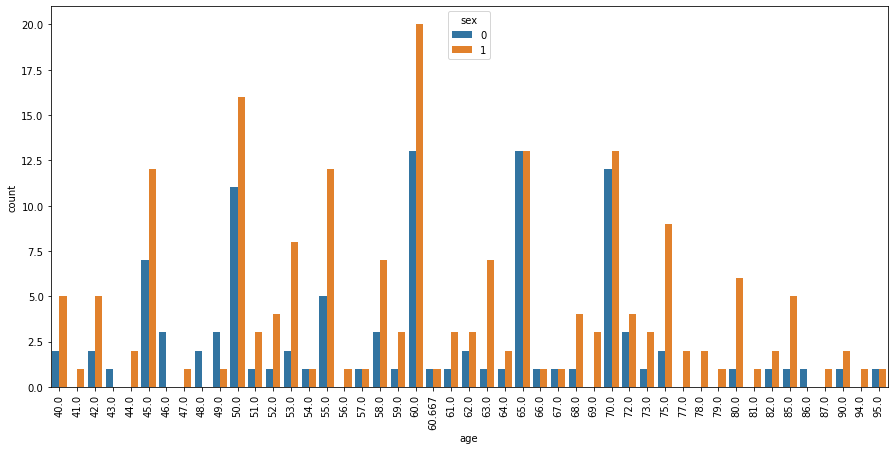

In [71]:
plt.figure(figsize = (15, 7))
sns.countplot(data = data, x = 'age', hue = 'sex')
plt.xticks(rotation = 90);

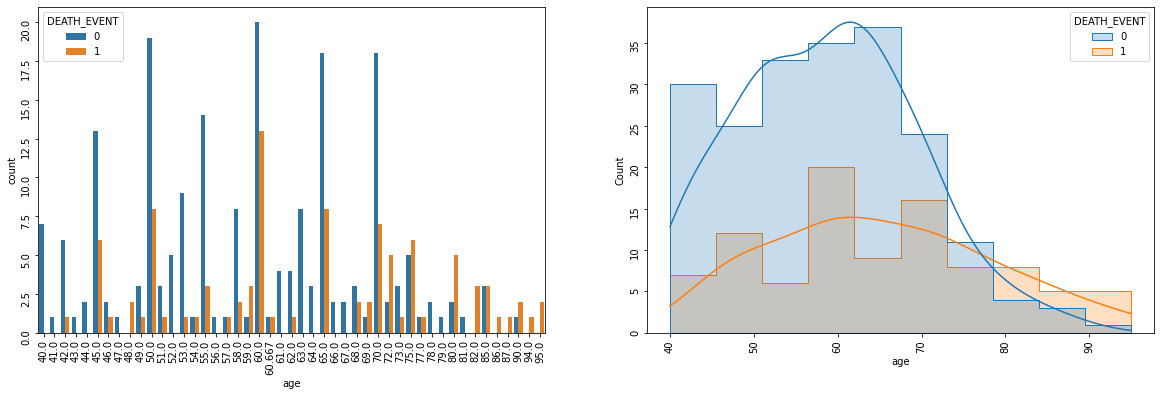

In [65]:
fig, ax = plt.subplots(ncols = 2, figsize= (20, 6))
sns.countplot(data = data, x = 'age', hue = 'DEATH_EVENT', ax = ax[0])
ax[0].tick_params(labelrotation=90)
sns.histplot(data = data, x = 'age', hue = 'DEATH_EVENT', element="step", ax = ax[1], kde = True)
ax[1].tick_params(labelrotation=90);

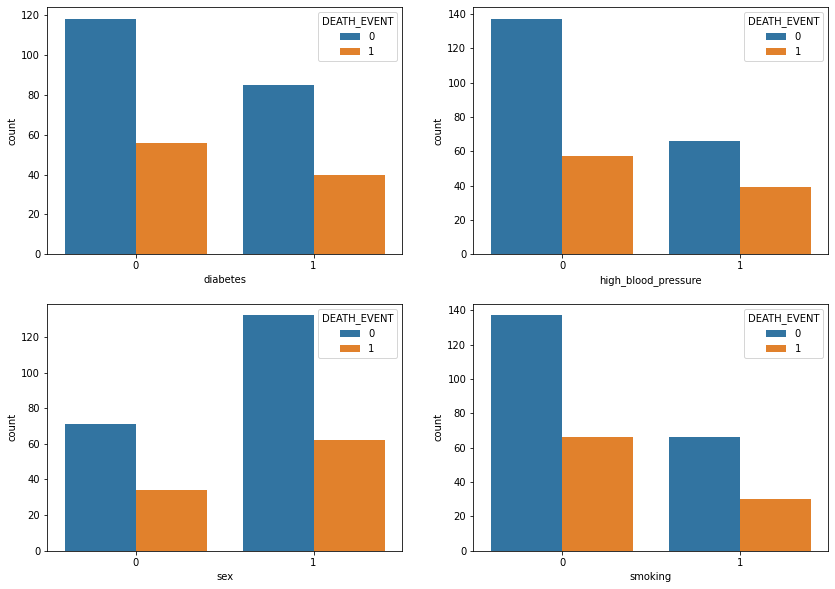

In [66]:
fig, ax = plt.subplots(2, 2, figsize= (14, 10))
sns.countplot(data = data, x = 'diabetes', hue = 'DEATH_EVENT', ax = ax[0][0])
sns.countplot(data = data, x = 'high_blood_pressure', hue = 'DEATH_EVENT', ax = ax[0][1])
sns.countplot(data = data, x = 'sex', hue = 'DEATH_EVENT', ax = ax[1][0])
sns.countplot(data = data, x = 'smoking', hue = 'DEATH_EVENT', ax = ax[1][1]);

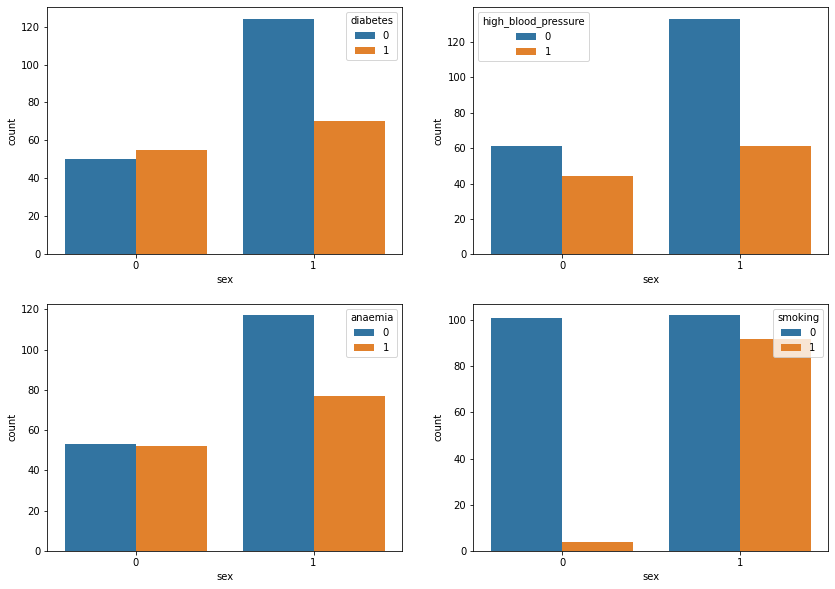

In [68]:
fig, ax = plt.subplots(2, 2, figsize= (14, 10))
sns.countplot(data = data, x = 'sex', hue = 'diabetes', ax = ax[0][0])
sns.countplot(data = data, x = 'sex', hue = 'high_blood_pressure', ax = ax[0][1])
sns.countplot(data = data, x = 'sex', hue = 'anaemia', ax = ax[1][0])
sns.countplot(data = data, x = 'sex', hue = 'smoking', ax = ax[1][1]);

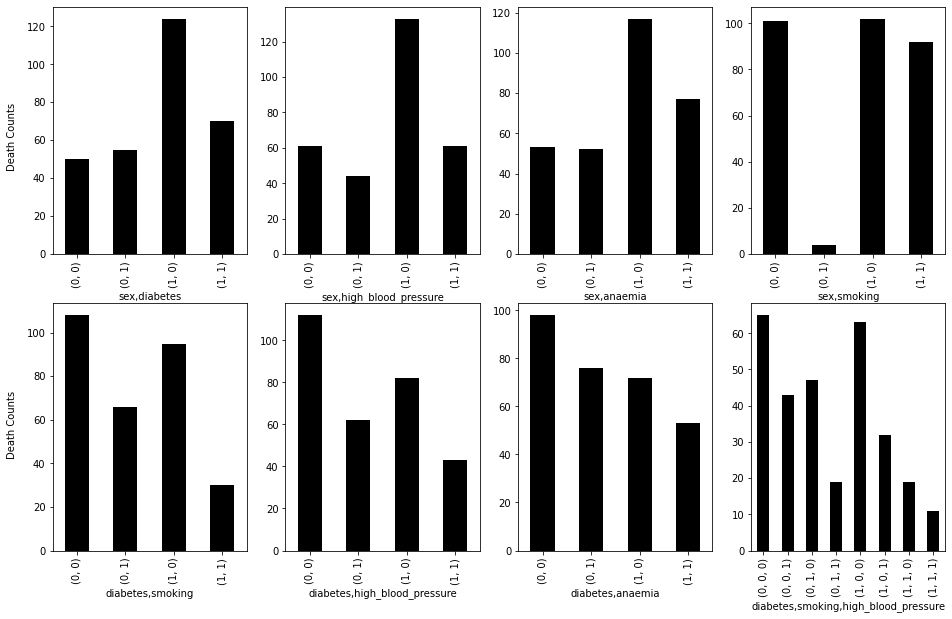

In [133]:
sex_dia_df = data.groupby(['sex', 'diabetes']).DEATH_EVENT.count()
sex_hbp_df = data.groupby(['sex', 'high_blood_pressure']).DEATH_EVENT.count()
sex_ana_df = data.groupby(['sex', 'anaemia']).DEATH_EVENT.count()
sex_smoke_df = data.groupby(['sex', 'smoking']).DEATH_EVENT.count()
dia_smoke_df = data.groupby(['diabetes', 'smoking']).DEATH_EVENT.count()
dia_hbp_df = data.groupby(['diabetes', 'high_blood_pressure']).DEATH_EVENT.count()
dia_ana_df = data.groupby(['diabetes', 'anaemia']).DEATH_EVENT.count()
dia_smok_hbp_df = data.groupby(['diabetes', 'smoking', 'high_blood_pressure']).DEATH_EVENT.count()

fig, ax = plt.subplots(2, 4, figsize= (16, 10))
sex_dia_df.plot.bar(ax=ax[0,0], color = 'black')
sex_hbp_df.plot.bar(ax=ax[0,1], color = 'black')
sex_ana_df.plot.bar(ax=ax[0,2], color = 'black')
sex_smoke_df.plot.bar(ax=ax[0,3], color = 'black')
dia_smoke_df.plot.bar(ax=ax[1,0], color = 'black')
dia_hbp_df.plot.bar(ax=ax[1,1], color = 'black')
dia_ana_df.plot.bar(ax=ax[1,2], color = 'black')
dia_smok_hbp_df.plot.bar(ax=ax[1,3], color = 'black')
fig.text(0.09, 0.7, 'Death Counts', va='center', ha='center', rotation='vertical')
fig.text(0.09, 0.3, 'Death Counts', va='center', ha='center', rotation='vertical');

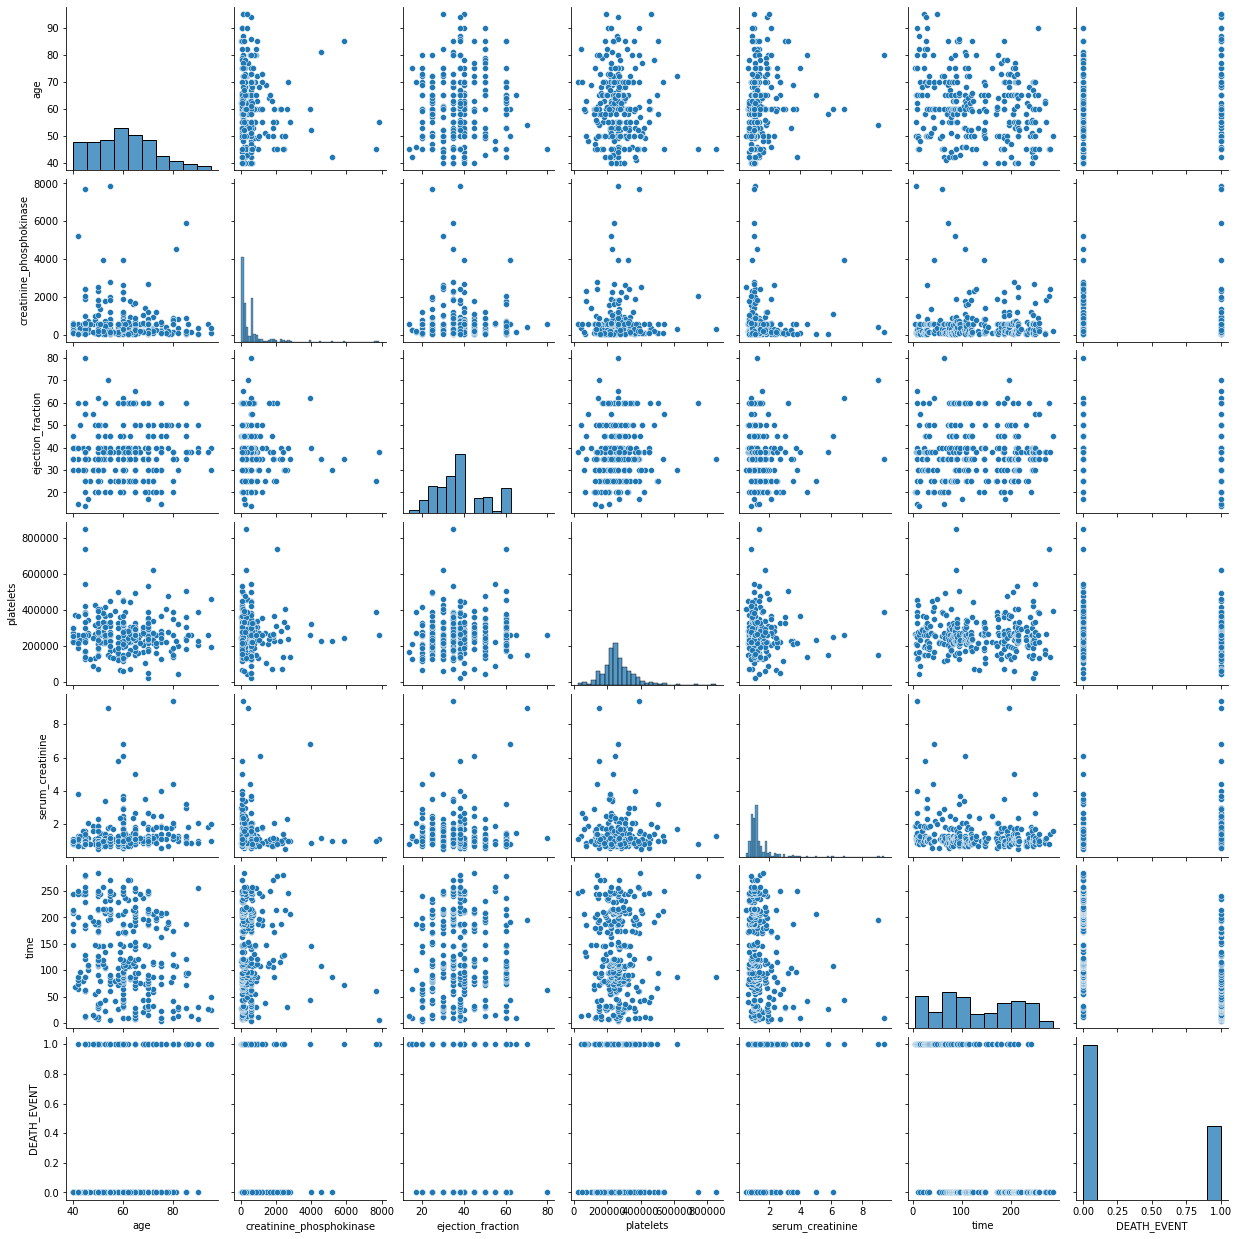

In [137]:
sns.pairplot(data = data[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'time', 'DEATH_EVENT']]);

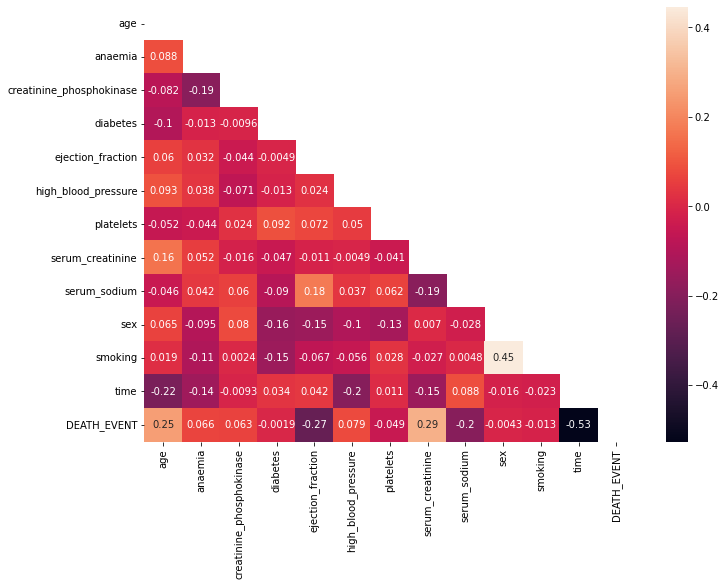

In [132]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize = (11, 8))
sns.heatmap(data.corr(), mask = mask, annot = True);

#Baseline Model

In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [273]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 27)

In [274]:
def train(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_pred_train, y_train)
    test_accuracy = accuracy_score(y_pred_test, y_test)

    print('The training accuracy of the model is:', round(train_accuracy * 100, 1))
    print('The testing accuracy of the model is:', round(test_accuracy*100, 2))

    return train_accuracy, test_accuracy

In [275]:
model_LR = LogisticRegression(max_iter=3000)
train_accuracy, test_accuracy = train(model_LR, X_train, X_test, y_train, y_test)

The training accuracy of the model is: 82.3
The testing accuracy of the model is: 83.33


# Feature Scalling

In [276]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [277]:
train_accuracy, test_accuracy = train(model_LR, X_train_scale, X_test_scale, y_train, y_test)

The training accuracy of the model is: 84.2
The testing accuracy of the model is: 82.22


# Model selection

In [290]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [291]:
models = {}
models['KNN'] = KNeighborsClassifier()
models['SVC'] = SVC()
models['NB'] = GaussianNB()
models['DT'] = DecisionTreeClassifier()
models['RF'] = RandomForestClassifier()
models['GBC'] = GradientBoostingClassifier()
models['XGB'] = XGBClassifier()

results = {}

for name, model in models.items():
    train_accuracy, test_accuracy = train(model, X_train_scale, X_test_scale, y_train, y_test)
    results[name] = test_accuracy

The training accuracy of the model is: 78.5
The testing accuracy of the model is: 72.22
The training accuracy of the model is: 85.6
The testing accuracy of the model is: 77.78
The training accuracy of the model is: 77.5
The testing accuracy of the model is: 76.67
The training accuracy of the model is: 100.0
The testing accuracy of the model is: 82.22
The training accuracy of the model is: 100.0
The testing accuracy of the model is: 82.22
The training accuracy of the model is: 100.0
The testing accuracy of the model is: 83.33
The training accuracy of the model is: 97.6
The testing accuracy of the model is: 84.44


In [292]:
results_df = pd.DataFrame({'model' : results.keys(), 'accuracy' : results.values()}).set_index('model')

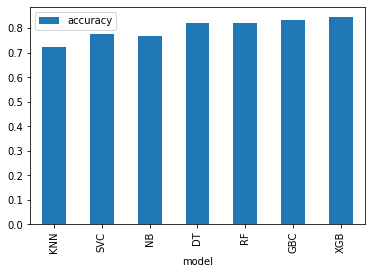

In [293]:
results_df.plot.bar();

# Feature Selection

In [294]:
LR = LogisticRegression(max_iter= 3000, penalty='l1',  solver='liblinear')
LR.fit(X_train_scale, y_train)

LogisticRegression(max_iter=3000, penalty='l1', solver='liblinear')

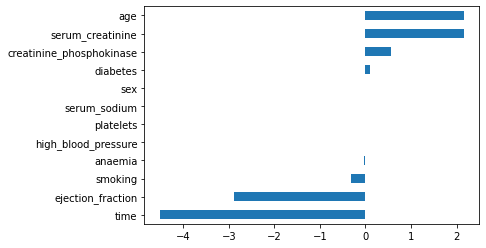

In [295]:
feat_importances_LR = pd.Series(LR.coef_[0], index=X_train.columns)
feat_importances_LR.nsmallest(12).plot(kind='barh')
plt.show()

In [327]:
feat_importances_LR

age                         2.159252
anaemia                    -0.026199
creatinine_phosphokinase    0.564677
diabetes                    0.102816
ejection_fraction          -2.879861
high_blood_pressure         0.000000
platelets                   0.000000
serum_creatinine            2.156831
serum_sodium                0.000000
sex                         0.000000
smoking                    -0.312294
time                       -4.518256
dtype: float64

In [ ]:
sns.set_style("darkgrid")
sns.barplot(x=feat_importances_LR.index, y=feat_importances_LR.Score, palette = "rocket", saturation =1.5)

In [296]:
[feat_importances_LR.nsmallest(12)]

[time                       -4.518256
 ejection_fraction          -2.879861
 smoking                    -0.312294
 anaemia                    -0.026199
 high_blood_pressure         0.000000
 platelets                   0.000000
 serum_sodium                0.000000
 sex                         0.000000
 diabetes                    0.102816
 creatinine_phosphokinase    0.564677
 serum_creatinine            2.156831
 age                         2.159252
 dtype: float64]

In [297]:
imp_features_LR = ['time', 'ejection_fraction', 'creatinine_phosphokinase', 'serum_creatinine', 'age']

In [298]:
RF = RandomForestClassifier()
RF.fit(X_train_scale, y_train)

RandomForestClassifier()

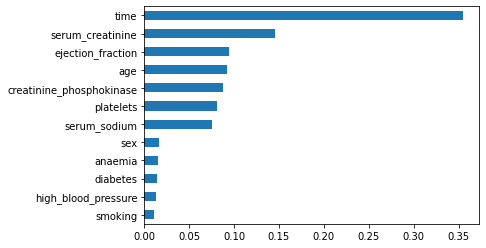

In [299]:
feat_importances_RF = pd.Series(RF.feature_importances_, index=X_train.columns)
feat_importances_RF.nsmallest(12).plot(kind='barh')
plt.show()

In [300]:
imp_features_RF = ['time', 'ejection_fraction', 'creatinine_phosphokinase', 'serum_creatinine', 'age', 'serum_sodium', 'platelets']

In [301]:
from sklearn.preprocessing import PolynomialFeatures

X_imp = X[imp_features_LR].values

model_lr = LogisticRegression(max_iter=3000)
degree = 5
score = []

for n in range(2, degree):
    poly = PolynomialFeatures(degree = n)

    X_poly = poly.fit_transform(X_imp)
    X_train_LR, X_test_LR, y_train, y_test = train_test_split(X_poly, y, test_size = 0.30, random_state = 27)

    X_train_LR_scale = scaler.fit_transform(X_train_LR)
    X_test_LR_scale = scaler.transform(X_test_LR)

    train_accuracy, test_accuracy = train(model_lr, X_train_LR_scale, X_test_LR_scale, y_train, y_test)
    score.append(test_accuracy)


The training accuracy of the model is: 84.2
The testing accuracy of the model is: 83.33
The training accuracy of the model is: 83.3
The testing accuracy of the model is: 83.33
The training accuracy of the model is: 84.7
The testing accuracy of the model is: 83.33


In [306]:
model_xgb = XGBClassifier()

X_imp = X[imp_features_RF].values
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size = 0.30, random_state = 27)

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

train_accuracy, test_accuracy = train(model_xgb, X_train_scale, X_test_scale, y_train, y_test)

The training accuracy of the model is: 97.6
The testing accuracy of the model is: 84.44


In [307]:
from sklearn.model_selection import GridSearchCV

In [308]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [309]:
grid_search = GridSearchCV(
    estimator=model_xgb,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [310]:
grid_search.fit(X_train_scale, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10, estimator=XGBClassifier(), n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)

In [311]:
grid_search.best_estimator_

XGBClassifier(learning_rate=0.05, max_depth=2)

In [312]:
grid_search.best_score_

0.9017006802721088

In [323]:
final_model = XGBClassifier(learning_rate=0.06, max_depth=2)
train_accuracy, test_accuracy = train(final_model, X_train_scale, X_test_scale, y_train, y_test)

The training accuracy of the model is: 93.8
The testing accuracy of the model is: 84.44


In [324]:
y_pred = final_model.predict(X_test_scale)

In [325]:
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)

[[57  6]
 [ 8 19]]


In [326]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        63
           1       0.76      0.70      0.73        27

    accuracy                           0.84        90
   macro avg       0.82      0.80      0.81        90
weighted avg       0.84      0.84      0.84        90

